In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
from statsmodels.tsa.stattools import adfuller

# Basic Data Preprocessing

In [2]:
raw_df = pd.read_excel("apple.xlsx")
raw_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Year,Months,Value
0,PP,Producer Prices,840,United States of America,5530,2010,January,481.0
1,PP,Producer Prices,840,United States of America,5530,2010,February,536.0
2,PP,Producer Prices,840,United States of America,5530,2010,March,485.0
3,PP,Producer Prices,840,United States of America,5530,2010,April,461.0
4,PP,Producer Prices,840,United States of America,5530,2010,May,505.0


In [3]:
# Retain only the necessary columns and rows
raw_df['Year'] = raw_df['Year'].astype(str)
raw_df['Months'] = raw_df['Months'].astype(str)
raw_df['Date'] = pd.to_datetime(raw_df['Year'] + '-' + raw_df['Months'], format='%Y-%B', errors='coerce')
reshaped_df = raw_df[['Date', 'Value']]
apple_df_raw = reshaped_df.set_index('Date')[['Value']]
apple_df_raw.head()


,Value
Date,
2010-01-01,481.0
2010-02-01,536.0
2010-03-01,485.0
2010-04-01,461.0
2010-05-01,505.0


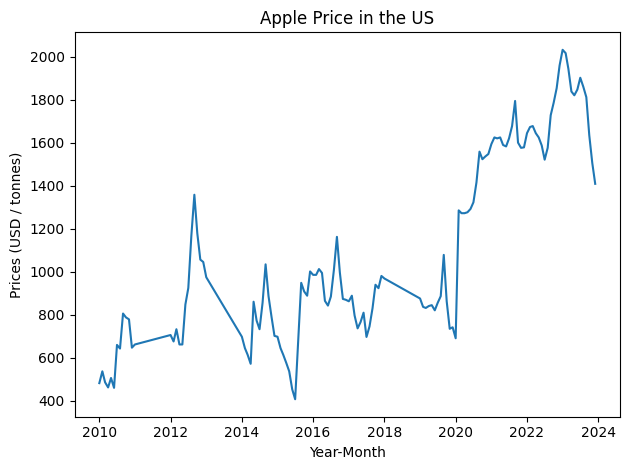

In [4]:
# Plot the time series
plt.plot(apple_df_raw)
plt.xlabel("Year-Month")
plt.ylabel("Prices (USD / tonnes)")
plt.title("Apple Price in the US")
plt.tight_layout()
plt.show()

In [5]:
# Information regarding the time series
apple_df_raw.describe()

,Value
count,135.000000
mean,1091.720000
std,438.332414
min,406.000000
25%,743.000000
50%,924.000000
75%,1553.150000
max,2032.700000


In [6]:
apple_df = apple_df_raw
apple_df["Value"] = np.log(apple_df_raw["Value"])
apple_df.describe()

,Value
count,135.000000
mean,6.915111
std,0.404994
min,6.006353
25%,6.610692
50%,6.828712
75%,7.348034
max,7.617120


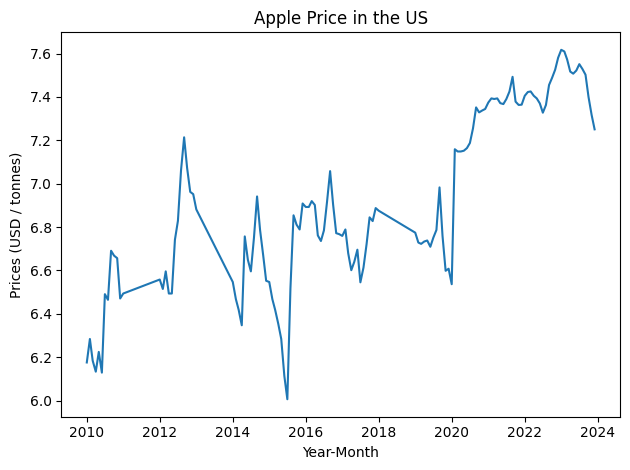

In [7]:
plt.plot(apple_df)
plt.xlabel("Year-Month")
plt.ylabel("Prices (USD / tonnes)")
plt.title("Apple Price in the US")
plt.tight_layout()
plt.show()

# Validation of the Time Series

In [8]:
# ADF Test
# P > 0.05 == Not stable
def adf_test(df: pd.DataFrame):
    re = adfuller(df)
    print(f"ADF Test Results:")
    print(f"T-value (ADF Statistic): {re[0]}")
    print(f"P-value: {re[1]}")
    print(f"Number of Lags Used: {re[2]}")
    print(f"Number of Observations Used: {re[3]}")
    print("Critical Values:")
    for key, value in re[4].items():
        print(f"    {key}: {value}")
    print(f"Maximized Information Criterion if autolag is not None: {re[5]}")

adf_test(apple_df)

ADF Test Results:
T-value (ADF Statistic): -2.216859738601522
P-value: 0.20018334710217855
Number of Lags Used: 1
Number of Observations Used: 133
Critical Values:
    1%: -3.480500383888377
    5%: -2.8835279559405045
    10%: -2.578495716547007
Maximized Information Criterion if autolag is not None: -162.1988664457624


In [9]:
# LB-test
# P-value < 0.05 == not random series / white noise
re = lb_test(apple_df, lags=20)
print(re)

        lb_stat      lb_pvalue
1    121.062778   3.702289e-28
2    225.956808   8.592165e-50
3    316.100646   3.257145e-68
4    393.540224   6.918099e-84
5    461.509859   1.615540e-97
6    520.146768  3.837656e-109
7    572.970693  1.606822e-119
8    621.103533  6.784758e-129
9    668.760206  3.583600e-138
10   716.275762  2.011631e-147
11   764.336569  8.567270e-157
12   811.052521  7.054578e-166
13   852.283447  8.668763e-174
14   888.655893  1.163068e-180
15   921.600762  8.390616e-187
16   950.225779  5.042818e-192
17   973.840279  3.537827e-196
18   992.551134  2.738834e-199
19  1008.088179  9.958045e-202
20  1022.138280  7.408790e-204


From the ADF test, we know that the series contained useful information and is currently not stable.

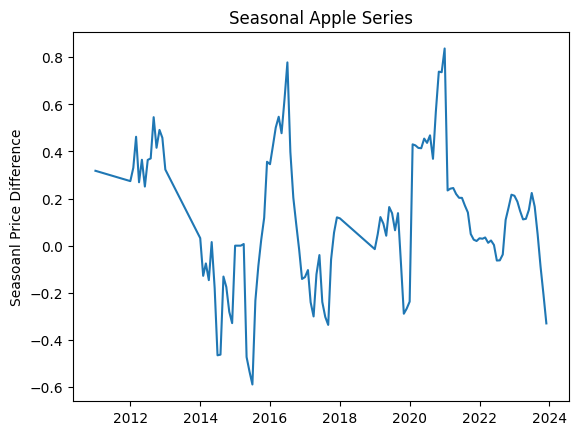

In [49]:
# Apply differencing to obtain a stable series
seasonal_apple_df = apple_df.diff(12).dropna()
plt.plot(seasonal_apple_df)
plt.title("Seasonal Apple Series")
plt.ylabel("Seasoanl Price Difference")
plt.show()

In [50]:
adf_test(seasonal_apple_df)

print()
re = lb_test(seasonal_apple_df, lags=20)
print(re)

ADF Test Results:
T-value (ADF Statistic): -3.0145548641586513
P-value: 0.03355733489658574
Number of Lags Used: 12
Number of Observations Used: 110
Critical Values:
    1%: -3.4912451337340342
    5%: -2.8881954545454547
    10%: -2.5809876033057852
Maximized Information Criterion if autolag is not None: -112.09456272255548

       lb_stat     lb_pvalue
1    90.647838  1.716595e-21
2   149.035570  4.338475e-33
3   183.860461  1.293408e-39
4   205.775428  2.152771e-43
5   219.331861  2.065806e-45
6   226.420705  4.444090e-46
7   228.984275  8.157603e-46
8   229.216485  4.336965e-45
9   229.500504  2.096160e-44
10  231.604290  3.958701e-44
11  237.947700  9.280841e-45
12  253.606524  2.420146e-47
13  270.349400  3.740929e-50
14  283.487160  3.249961e-52
15  290.531106  5.171693e-53
16  295.689514  1.990504e-53
17  301.084616  6.723397e-54
18  309.558615  5.191257e-55
19  322.001438  6.068747e-57
20  335.687948  3.930603e-59


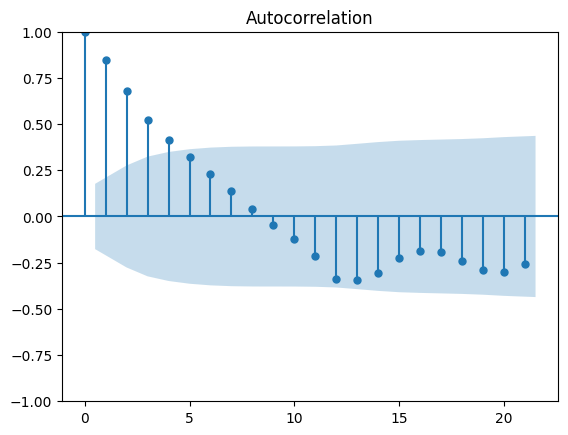

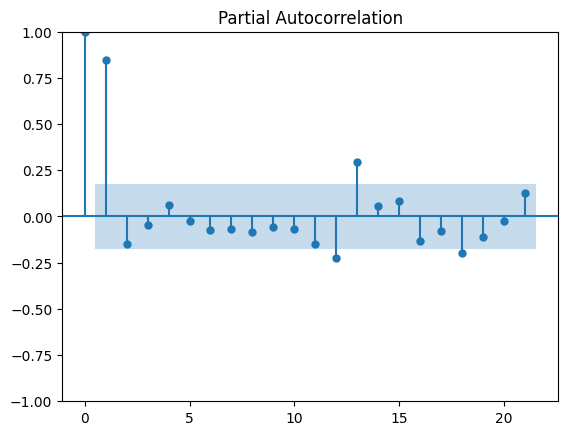

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(seasonal_apple_df)
plot_pacf(seasonal_apple_df)
plt.show()

The ACF and PACF plots cut off at 1. Proceed with SARIMA model

# Model Fitting

c:\Users\yushe\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yushe\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  123
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  61.304
Date:                Tue, 06 May 2025   AIC                           -118.607
Time:                        18:28:55   BIC                           -112.999
Sample:                             0   HQIC                          -116.330
                                - 123                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8769      0.036     24.265      0.000       0.806       0.948
sigma2         0.0214      0.002     11.284      0.000       0.018       0.025
Ljung-Box (L1) (Q):                   2.28   Jarque-

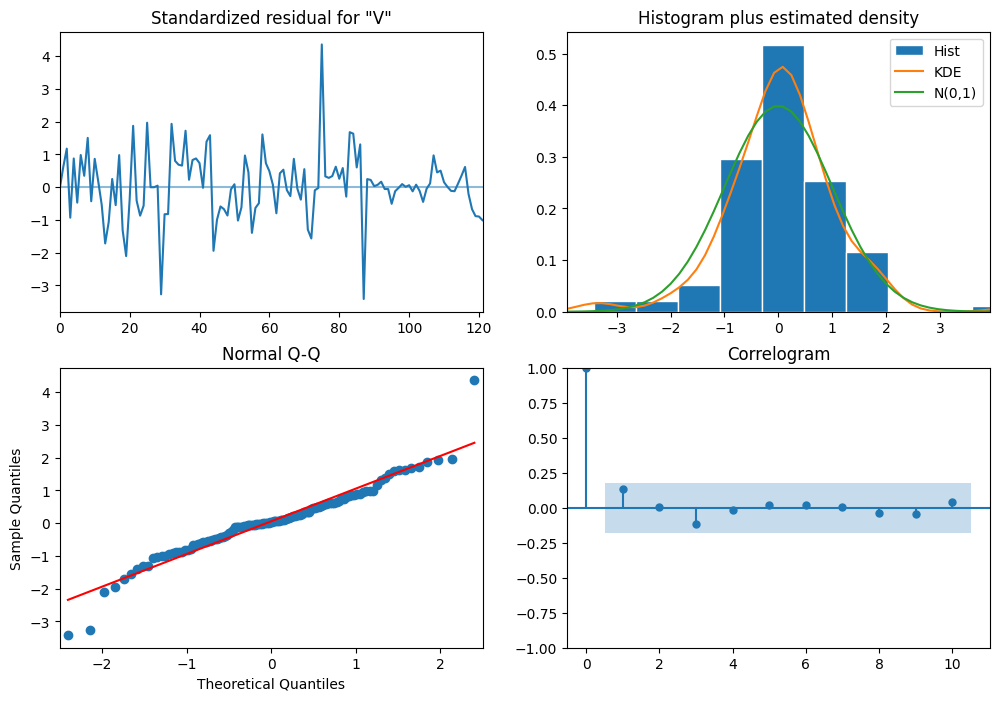

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(seasonal_apple_df,
                order=(1, 0, 0),
                seasonal_order=(0, 0, 0, 13),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()
print(results.summary())

results.plot_diagnostics(figsize=(12, 8))
plt.show()